In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 

Text(0, 0.5, 'Normalized Flux')

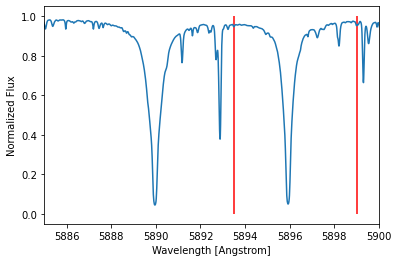

In [2]:
spec = astropy.io.ascii.read("solar_spectrum.txt")

plt.plot(spec["col1"], spec["col2"] / 1e4)
# plt.vlines(5887.5, 0, 10000, color="red")
# plt.vlines(5892.5, 0, 10000, color="red")
plt.vlines(5893.5, 0, 1, color="red")
plt.vlines(5899, 0, 1, color="red")
plt.xlim(5885, 5900)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

## 1, Equivalent width (ew) is defined as the width of a rectangle with a height equal to that of continuum emission such that the area of the rectangle is equal to the area in the spectral line.

In [3]:
ind = np.where((spec["col1"] < 5899) & (spec["col1"] > 5893.5))
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4
print("equivalent width (ew) = ", ew, " Angstrom")

print(np.log10(0.712 / 5896.0))

equivalent width (ew) =  0.7122700000155473  Angstrom
-3.9180774812141386


## Now find the number of Na atoms in absorbing state based on the following curve of growth plot:
<img src="http://spiff.rit.edu/classes/phys440/lectures/curve/gcurve.jpg" width="600 pt">

## log(W/$\lambda$) = log(0.71 / 5890) = -3.92, where W is equivalent width.
## The corresponding value on x-axis is log(Nf($\lambda/5000\overset{\circ}{A}$))$\sim$14.7.

In [4]:
N_neutral = 10**14.7 / 0.65 / (5896 / 5000)
print(N_neutral/1e14)

6.538816846196528


## Rearranged, we have N = $6.54\times10^{14}$ with the unit of atoms/cm$^2$, assuming f = 0.65, where f is the oscillator strength for this transition at 5896 $\overset{\circ}{A}$.

## 2, Estimate the ratio of sodium atoms in the ground state to sodium atoms in excited states using the Boltzmann equation:

## $\frac{N_2}{N_1} = \frac{g_2}{g_1}\exp\left({-\frac{E_2 - E_1}{kT}}\right)$, where subscripts 1 and 2 refer to 3s and 3p states, $N$ is number density, $g$ is the number of separate, individual states that are degenerate in energy, $E$ is energy at the state, $k$ is Boltzmann constant, and $T$ is temperature.

Effective temperature of the sun is taken from [Reinhold et al. 2020](https://ui.adsabs.harvard.edu/abs/2020Sci...368..518R/abstract)

Sodium energy levels are taken from [the Hyperphysics site](http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/sodium.html#c1)

Values for $g_2$ and $g_1$ are taken from the p and s shell degeneracies listed [here](https://www.chemicool.com/definition/degenerate.html)

In [5]:
# Programming values for the Boltzmann equation

k = 1.380649E-23  #kg*m^2*s^-2*K^-1

T = 5780 #effective temperature of the Sun, units of Kelvin

E_2 = -3.04*1.60218E-19 #3p energy level in joules
E_1 = -5.14*1.60218E-19 #3s engery level in joules
delta_E = np.absolute(E_2-E_1)

g_2 = 3
g_1 = 1

In [6]:
# calculating the Boltzmann equation

boltz_Na = (g_2/g_1)*np.exp(-delta_E/(k*T))
print("The ratio of excited sodium atoms to ground state atoms is", boltz_Na)

The ratio of excited sodium atoms to ground state atoms is 0.04426455774337758


## 3, Estimate the ratio of neutral sodium atoms to ionized sodium atoms. You will use the Saha equation:

## $\frac{Na_{II}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}\exp{\left(-\frac{\chi}{kT}\right)}$, where $m_e$ is electron mass, partition function $Z_I = 2.4$ and  $Z_{II} = 1.0$, electron pressure $P_e = n_e kT = 1.0 N\cdot m^{-2}$, and the ionization energy $\chi = 5.1$ eV. Note that the values given are for the sodium line only. Other lines have different values. 

In [7]:
#Programming values for the Saha equation
chi = 5.1 #eV
chi_J = chi*1.60218E-19 #joules

P_e = 1 #kg m^-1 s^-2

Z_1 = 2.4 #unitless
Z_2 = 1.0 #unitless

m_e = 9.1093837E-31 #kg

k = 1.380649E-23  #kg*m^2*s^-2*K^-1

h = 6.62607015E-34 #m^2 kg s^-1

T = 5780 #effective temperature of the Sun, units of Kelvin

In [8]:
#Programming the Saha equation

saha_Na = ((2*k*T)/P_e)*(Z_2/Z_1)*((2*np.pi*m_e*k*T)**(3/2)/h**3)*np.exp(-chi_J/(k*T))
print("The ratio of ionized to neutral sodium atoms is", saha_Na)

The ratio of ionized to neutral sodium atoms is 2521.7923165903635


## 4, Compute the total column density of sodium atoms in the sun's photosphere, assuming the total number of sodium atoms equals to: $N_{1} \times (1+\frac{N_2}{N_1}) \times (1+\frac{Na_{II}}{Na_{I}}$). $N_1$ is measured from the curve of growth. The last two terms have been calculated in question 1 and 2. 

In [9]:
#Entering values

N0 = N_neutral
N_exc = boltz_Na
N_ion = saha_Na
                          
# calculating column density
CD_Na = N0 * (1+N_exc) * (1+N_ion)
print("The column density of sodium atoms in the photosphere is", CD_Na)

The column density of sodium atoms in the photosphere is 1.7226268447619016e+18


In [10]:
# Ratio of abundance
# Physicist way
N_H = 6.6e23
Na_ratio_p = CD_Na / N_H
print("The ratio of sodium atoms to hydrogen atoms in the photosphere is", Na_ratio_p)

Mass_density_Na = 23 * CD_Na
Mass_density_H = N_H
logNa = 12 + np.log10(CD_Na / Mass_density_H)
print("The abundance of sodium atoms in the photosphere is:",logNa)

The ratio of sodium atoms to hydrogen atoms in the photosphere is 2.610040673881669e-06
The abundance of sodium atoms in the photosphere is: 6.416647275271127


# The rest will be for Mg b1 line with wavelength 5183.6

Text(0, 0.5, 'Normalized Flux')

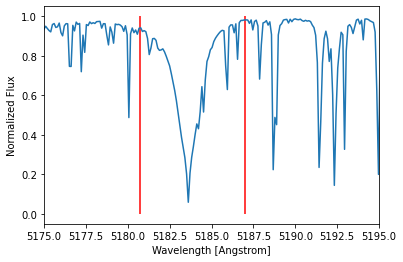

In [11]:
spec2 = astropy.io.ascii.read("Mg5184.txt")

plt.plot(spec2["col1"], spec2["col2"] / 1e4)
# plt.vlines(5887.5, 0, 10000, color="red")
# plt.vlines(5892.5, 0, 10000, color="red")
plt.vlines(5180.7, 0, 1, color="red")
plt.vlines(5187, 0, 1, color="red")
plt.xlim(5175, 5195)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

## 1, Equivalent width (ew) is defined as the width of a rectangle with a height equal to that of continuum emission such that the area of the rectangle is equal to the area in the spectral line.

In [12]:
ind = np.where((spec2["col1"] < 5187) & (spec2["col1"] > 5180.7))
inc = np.median(np.diff(spec2["col1"][ind]))
ew = np.sum(1e4 - spec2["col2"][ind]) * inc / 1e4
print("equivalent width (ew) = ", ew, " Angstrom")

print(np.log10(1.73 / 5183.6))

equivalent width (ew) =  1.7299811999976555  Angstrom
-3.4765853780641462


## Now find the number of Mg atoms in absorbing state based on the following curve of growth plot:
<img src="http://spiff.rit.edu/classes/phys440/lectures/curve/gcurve.jpg" width="600 pt">

## log(W/$\lambda$) = log(0.71 / 5890) = -3.48, where W is equivalent width.
## The corresponding value on x-axis is log(Nf($\lambda/5000\overset{\circ}{A}$))$\sim$15.1.

In [13]:
Mg_neutral = 10**15.1 / 0.65 / (5183.6 / 5000)
print(Mg_neutral/1e15)

1.8682077377085218


## Rearranged, we have N = $1.87\times10^{15}$ with the unit of atoms/cm$^2$, assuming f = 0.32, where f is the oscillator strength for this transition at 5183.6 $\overset{\circ}{A}$. Found at https://www.aanda.org/articles/aa/pdf/2017/02/aa29849-16.pdf

## 2, Estimate the ratio of Mg atoms in the ground state to sodium atoms in excited states using the Boltzmann equation:

## $\frac{N_2}{N_1} = \frac{g_2}{g_1}\exp\left({-\frac{E_2 - E_1}{kT}}\right)$, where subscripts 1 and 2 refer to 3s and 3p states, $N$ is number density, $g$ is the number of separate, individual states that are degenerate in energy, $E$ is energy at the state, $k$ is Boltzmann constant, and $T$ is temperature.

In [14]:
# Programming values for the Boltzmann equation

k = 1.380649E-23  #kg*m^2*s^-2*K^-1

T = 5780 #effective temperature of the Sun, units of Kelvin

c = 299792458 #m/s

E = (h * c) / (5183.6e-10)

g1 = 2
g2 = 6

# calculating the Boltzmann equation

boltz_Mg = (g2/g1)*np.exp(-E/(k*T))
print("The ratio of excited Magnesium atoms to ground state atoms is", boltz_Mg)

The ratio of excited Magnesium atoms to ground state atoms is 0.02463664984401851


## 3, Estimate the ratio of neutral Mg atoms to ionized Mg atoms. You will use the Saha equation:

## $\frac{Na_{II}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}\exp{\left(-\frac{\chi}{kT}\right)}$, where $m_e$ is electron mass, partition function $Z_I = 2.4$ and  $Z_{II} = 1.0$, electron pressure $P_e = n_e kT = 1.0 N\cdot m^{-2}$, and the ionization energy $\chi = 7.65$ eV

In [15]:
#Programming values for the Saha equation
chi = 7.65 #eV
chi_J = chi*1.60218E-19 #joules

P_e = 1 #kg m^-1 s^-2

Z_1 = 2.4 #unitless
Z_2 = 1.0 #unitless

m_e = 9.1093837E-31 #kg

k = 1.380649E-23  #kg*m^2*s^-2*K^-1

h = 6.62607015E-34 #m^2 kg s^-1

T = 5780 #effective temperature of the Sun, units of Kelvin

#Programming the Saha equation

saha_Mg = ((2*k*T)/P_e)*(Z_2/Z_1)*((2*np.pi*m_e*k*T)**(3/2)/h**3)*np.exp(-chi_J/(k*T))
print("The ratio of ionized to neutral Mg atoms is", saha_Mg)

The ratio of ionized to neutral Mg atoms is 15.075547507885664


In [16]:
#Entering values

Mg0 = Mg_neutral
Mg_exc = boltz_Mg
Mg_ion = saha_Mg
                          
# calculating column density
CD_Mg = Mg0 * (1+Mg_exc) * (1+Mg_ion)
print("The column density of Mg atoms in the photosphere is", CD_Mg)

The column density of Mg atoms in the photosphere is 3.077236149834608e+16


In [17]:
# Ratio of abundance
# Physicist way
N_H = 6.6e23
Mg_ratio_p = CD_Mg / N_H
print("The ratio of Mg atoms to hydrogen atoms in the photosphere is", Mg_ratio_p)

Mass_density_Mg = 24.35 * CD_Mg
Mass_density_H = N_H
logMg = 12 + np.log10(CD_Mg / Mass_density_H)
print("The abundance of Magnesium atoms in the photosphere is:",logMg)

The ratio of Mg atoms to hydrogen atoms in the photosphere is 4.662479014900921e-08
The abundance of Magnesium atoms in the photosphere is: 4.668616890128649
